In [2]:
import numpy as np
from numba import njit, prange
import matplotlib.pyplot as plt

np.random.seed(1707)

In [3]:
# ----------------------------------- DEBUG ---------------------------------- #
DEBUG = False

# ----------------------------------- TRUTH ---------------------------------- #
FALSE = 0
TRUE = 1
NULL = -1


In [4]:
@njit
def random_items(shape : tuple[int], scale : int) -> np.ndarray:
    return np.random.random(shape) * scale

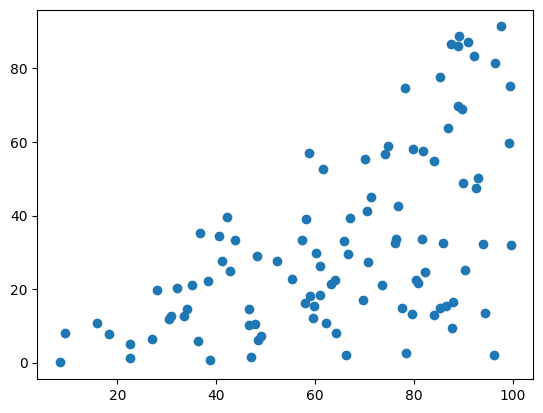

In [5]:
items = random_items((100, 2), 100)

for item in items:
    if item[0] < item[1]:
        temp = item[0]
        item[0] = item[1]
        item[1] = temp

plt.scatter(items[:, 0], items[:, 1])

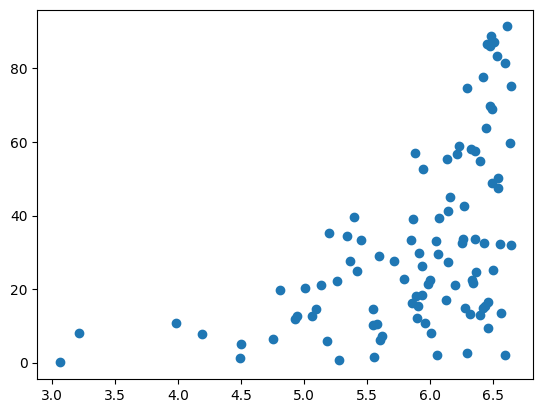

In [6]:


for item in items:
    item[0] = np.log2(item[0])

plt.scatter(items[:, 0], items[:, 1])

[ 1  3  5  7  8  9 10 12 13 16 18 19 21 22 25 27 28 30 32 33 34 35 39 40
 41 42 43 45 46 48 49 51 52 54 57 60 62 68 69 72 73 74 76 80 82 83 84 85
 86 88 89 90 92 97 98 99] [ 0  2  4  6 11 14 15 17 20 23 24 26 29 31 36 37 38 44 47 50 53 55 56 58
 59 61 63 64 65 66 67 70 71 75 77 78 79 81 87 91 93 94 95 96]


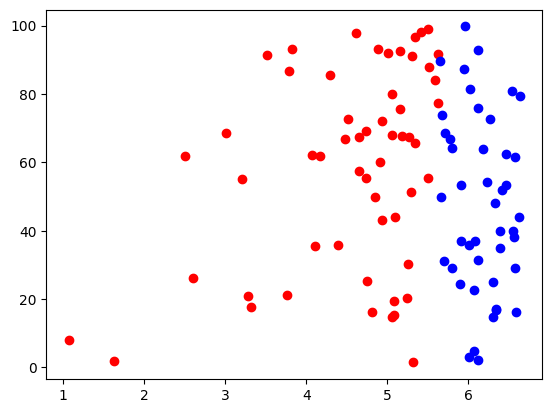

In [7]:
items = random_items((100, 2), 100)
items[:, 0] = np.log2(items[:, 0])

@njit
def divide(nodes, node_idx : np.ndarray, L):
    L2 = L - 1

    left = np.argwhere(nodes[node_idx, 0] <= L2).T[0]
    right = np.argwhere(nodes[node_idx, 0] > L2).T[0]

    return node_idx[left], node_idx[right]

bound = np.max(items[:, 0])
idx = np.array(range(len(items)))
left, right = divide(items, idx, bound)

print(left, right)

plt.scatter(items[left][:, 0], items[left][:, 1], c='red')
plt.scatter(items[right][:, 0], items[right][:, 1], c='blue')

[ 8  9 12 13 18 21 22 25 27 34 35 52 57 69 73 74 76 86 88 98] [ 1  3  5  7 10 16 19 28 30 32 33 39 40 41 42 43 45 46 48 49 51 54 60 62
 68 72 80 82 83 84 85 89 90 92 97 99]


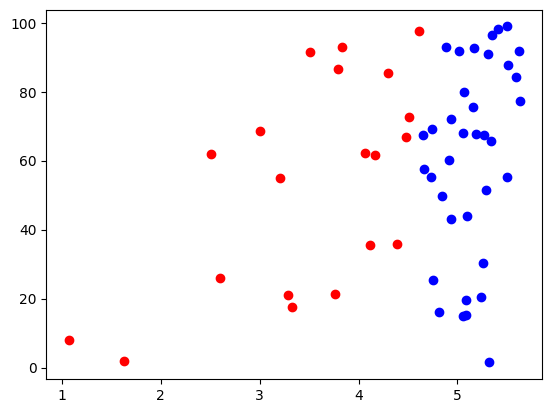

In [8]:
left, right = divide(items, left, bound - 1)

print(left, right)

plt.scatter(items[left][:, 0], items[left][:, 1], c='red')
plt.scatter(items[right][:, 0], items[right][:, 1], c='blue')

In [9]:
@njit
def categorize_items()

SyntaxError: invalid syntax (1047557769.py, line 2)

In [ ]:
ITEMS_COUNT = 0

# items = random_items((100, 2), 100)

# def get_items_in_division(items, item_range):
#     pass

# def divide(items, n, max_size):
#     log_items = np.log2(items[:, 0])
#     for i, item in enumerate(items):
#     item_ranges = np.empty((bound + 1, max_size))

#     for i in prange(bound + 1):
#         item_ranges[i, 1:] = items[np.argwhere(item_divisions == i)][0]

#     return item_ranges

# print(divide(items, 4))


# @njit
# def divide(nodes, node_idx : np.ndarray):
#     logs = np.argwhere(np.log2(nodes[node_idx]) < )

#     left = np.where(nodes[node_idx, 0] <= L2)[0]
#     right = np.where(nodes[node_idx, 0] > L2)[0]

#     return left, right

# bound = np.max(items[:, 0])
# idx = np.arange(len(items))
# left, right = divide(items, idx, bound)


plt.scatter(items[left][:, 0], items[left][:, 1], c='red')
plt.scatter(items[right][:, 0], items[right][:, 1], c='blue')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
# def is_in_range(lower, upper, x):
#     return 

# def binpack_ptas(bin, items):
#     x_idx = np.argsort(items[:, 0])

#     while items:
        

In [ ]:
DATA = 0

NEXT_EMPTY = 0
ITEMS_COUNT = 1
MAX_SIZE = 2

NODES = 1

PARENT = 0
CHILDREN = 1
LEVEL = 2
BIN_HEIGHT = 3


@njit
def new_tree(max_size=500, items_count=100, dtype=np.int16):
    tree = np.full((max_size, BIN_HEIGHT + 1), NULL, dtype=dtype)
    tree[DATA][NEXT_EMPTY] = 1
    tree[DATA][ITEMS_COUNT] = 0
    tree[DATA][MAX_SIZE] = max_size

    bin_idx = np.full((max_size, items_count), NULL, dtype=dtype)
    bin_idx[:, NEXT_EMPTY] = 1 

    return (tree, bin_idx)


@njit
def add_node_to_tree(tree, bin_idx, parent):
    if tree[DATA][NEXT_EMPTY] == tree[DATA][MAX_SIZE]:
        temptree = tree
        temp_bin_idx = bin_idx

        tree, bin_idx = new_tree(max_size=temptree[DATA][MAX_SIZE] + 100)
        tree[1:len(temptree)] = temptree[1:len(temptree)]
        bin_idx[1:len(temp_bin_idx)] = temp_bin_idx[1:len(temp_bin_idx)]
        tree[DATA][NEXT_EMPTY] = temptree[DATA][NEXT_EMPTY]

    node_idx = tree[DATA][NEXT_EMPTY]
    node = tree[node_idx]

    node[PARENT] = parent
    if parent != NULL and tree[parent][CHILDREN] == NULL:
        tree[parent][CHILDREN] = node_idx
    node[LEVEL] = tree[parent][LEVEL] + 1 if parent != NULL else 0

    tree[DATA][NEXT_EMPTY] += 1
    return (tree, bin_idx)


@njit
def initialize_tree(tree_size=100, items_count=100):
    tree, bin_idx = new_tree(tree_size, dtype=np.int16)

    tree, bin_idx = add_node_to_tree(tree, bin_idx, NULL)
    return tree, bin_idx

In [ ]:
tree, bin_idx = new_tree()
tree, bin_idx = add_node_to_tree(tree, bin_idx, parent=1)
tree, bin_idx = add_node_to_tree(tree, bin_idx, parent=2)


In [ ]:
tree

array([[  3,   0, 500,  -1],
       [  1,   1,   0,  -1],
       [  2,   2,   0,  -1],
       ...,
       [ -1,  -1,  -1,  -1],
       [ -1,  -1,  -1,  -1],
       [ -1,  -1,  -1,  -1]], dtype=int16)

In [ ]:
items = random_items((10, 2), 10)

for item in items:
    if item[0] < item[1]:
        temp = item[0]
        item[0] = item[1]
        item[1] = temp

In [ ]:
IS_LEAF = 0
BIN_IDX = 1
SUBPROBLEM = np.array((2, 3))

bin_size = np.array((50, 50))
bin_dp = np.full((len(tree), bin_size[1], 4), NULL)


def get_items(items, epsilon, a):
    for i 


In [ ]:
items = random_items((20, 2), 10)
bin_bound = 15
bin_idx = np.empty((len(items), ))

In [ ]:
from numba import njit

@njit
def max_heapify_2d(A, size, node_idx=0, axis=0):
    largest = node_idx
    left_child = 2 * node_idx + 1
    right_child = 2 * (node_idx + 1)
    if (left_child < size) and (A[left_child, axis] > A[largest, axis]):
        largest = left_child
    if (right_child < size) and (A[right_child, axis] > A[largest, axis]):
        largest = right_child
    if largest != node_idx:
        A[node_idx], A[largest] = A[largest], A[node_idx]  # exchange 2 nodes
        max_heapify_2d(A, size, largest)

@njit
def build_max_heap_2d(A):
    size = len(A)
    node_idx = size // 2 - 1  # last non-leaf node index
    for i in range(node_idx, -1, -1):
        max_heapify_2d(A, size, node_idx=i)
    return size

items = random_items((5, 2), 10)
print(items)
build_max_heap_2d(items)
print(items)

[[9.18447226 3.0389775 ]
 [9.3583694  0.73283794]
 [6.32700406 7.53257757]
 [2.76904333 4.20624775]
 [6.91075564 6.68071588]]
[[9.3583694  0.73283794]
 [9.3583694  0.73283794]
 [6.32700406 7.53257757]
 [2.76904333 4.20624775]
 [6.91075564 6.68071588]]


In [ ]:
@njit
def max_heapify_numba(A, size, node_idx=0):
    largest = node_idx
    left_child = 2 * node_idx + 1
    right_child = 2 * (node_idx + 1)
    if (left_child < size) and (A[left_child] > A[largest]):
        largest = left_child
    if (right_child < size) and (A[right_child] > A[largest]):
        largest = right_child
    if largest != node_idx:
        A[node_idx], A[largest] = A[largest], A[node_idx]  # exchange 2 nodes
        max_heapify_numba(A, size, largest)

@njit
def build_max_heap(A):
    size = len(A)
    node_idx = size // 2 - 1  # last non-leaf node index
    for i in range(node_idx, -1, -1):
        max_heapify_numba(A, size, node_idx=i)
    return size

items = random_items(10, 10)
print(items)
build_max_heap(items)
print(items)


[0.03272214 5.36950119 1.18931745 5.54303855 5.8584969  4.08524633
 0.82033562 7.68412778 9.59198259 2.51518664]
[9.59198259 7.68412778 4.08524633 5.54303855 5.8584969  1.18931745
 0.82033562 5.36950119 0.03272214 2.51518664]


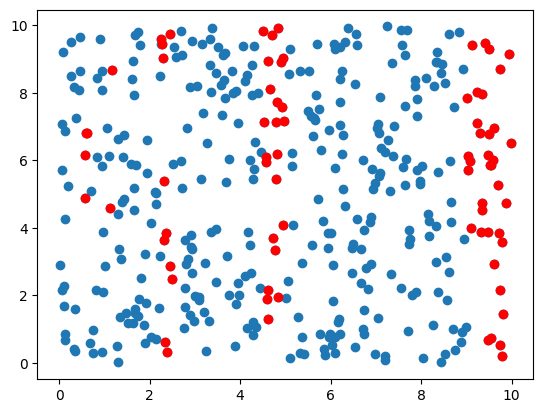

In [25]:
def get_in_interval(lower, upper, items):
    interval1 = items[items[:, 0] > lower]
    interval2 = items[items[:, 0] < upper]

items = random_items((400, 2), 10)
# items = np.round(items)
a = 10
s = 1
interval1 = items[a - s < items[:, 0]]
interval2 = items[((a - s)/2 < items[:, 0]) * (items[:, 0] < a/2)]
interval3 = items[((a - s)/4 < items[:, 0]) * (items[:, 0] < a/4)]
interval4 = items[((a - s)/8 < items[:, 0]) * (items[:, 0] < a/8)]
interval5 = items[((a - s)/16 < items[:, 0]) * (items[:, 0] < a/16)]
interval6 = items[((a - s)/32 < items[:, 0]) * (items[:, 0] < a/32)]


plt.scatter(items[:, 0], items[:, 1])
plt.scatter(interval1[:, 0], interval1[:, 1], c='r')
plt.scatter(interval2[:, 0], interval2[:, 1], c='r')
plt.scatter(interval3[:, 0], interval3[:, 1], c='r')
plt.scatter(interval4[:, 0], interval4[:, 1], c='r')
plt.scatter(interval5[:, 0], interval5[:, 1], c='r')
plt.scatter(interval6[:, 0], interval6[:, 1], c='r')

In [14]:
from matplotlib.patches import Rectangle

def draw_rect(x, y, l, w, color1, color2):
    rec= Rectangle((x,y),l,w,linewidth=1,edgecolor=color1,facecolor=color2)
    plt.gca().add_patch(rec)


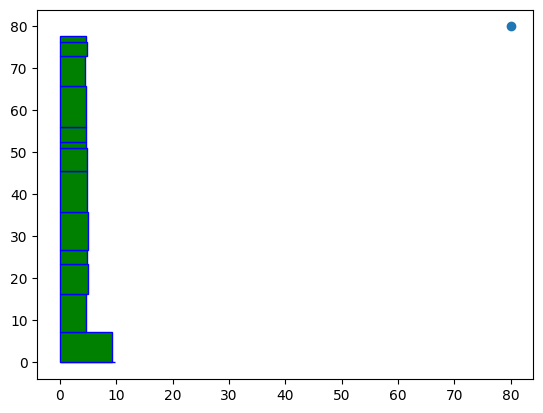

In [30]:
# items = random_items((200, 2), 5)
# items = np.round(items)

# for item in items:
#     if item[0] < item[1]:
#         temp = item[0]
#         item[0] = item[1]
#         item[1] = temp


a = 30
s = 2
# interval1 = items[a - s < items[:, 0]]
# interval2 = items

order1 = np.argsort(interval4[:, 1])[::-1]
order2 = np.argsort(interval3[:, 1])[::-1]

bin = (80, 80)
bin_pos = np.empty((100, 2))
y_fill = 0
plt.scatter(bin[0], bin[1])
for item in interval1[order1]:
    if y_fill + item[1] > bin[1]:
        continue
    draw_rect(0, y_fill, item[0], item[1], color1='b', color2='g')
    y_fill += item[1]

y1_fill = y_fill
y2_fill = y_fill
for item in interval2[order2]:
    if y1_fill + item[1] > bin[1]:
        continue
    draw_rect(0, y1_fill, item[0], item[1], color1='b', color2='g')
    y1_fill += item[1]

for item in interval2[order2]:
    if y1_fill + item[1] > bin[1]:
        continue
    draw_rect(0, y1_fill, item[0], item[1], color1='b', color2='g')
    y1_fill += item[1]

plt.show()

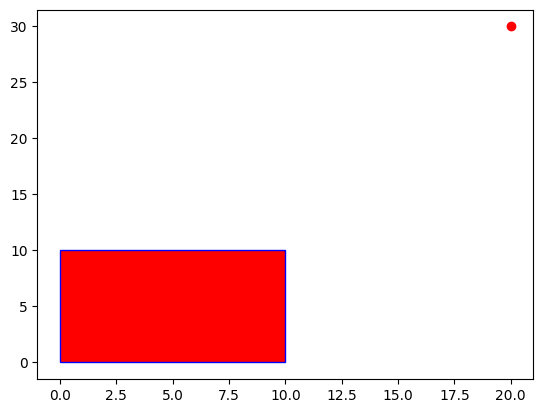